In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df_train = pd.read_csv('/kaggle/input/titanic/train.csv')
df_train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
474,475,0,3,"Strandberg, Miss. Ida Sofia",female,22.0,0,0,7553,9.8375,NaN,S
758,759,0,3,"Theobald, Mr. Thomas Leonard",male,34.0,0,0,363294,8.0500,NaN,S
796,797,1,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,D17,S
76,77,0,3,"Staneff, Mr. Ivan",male,NaN,0,0,349208,7.8958,NaN,S


In [5]:
df_test = pd.read_csv('/kaggle/input/titanic/test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### We are supposed to predict if the passenger survived or not given the passenger id

- Target Column: Survived
- Model : Logistic Regression

In [6]:
df_train['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

<Axes: xlabel='Age', ylabel='Density'>

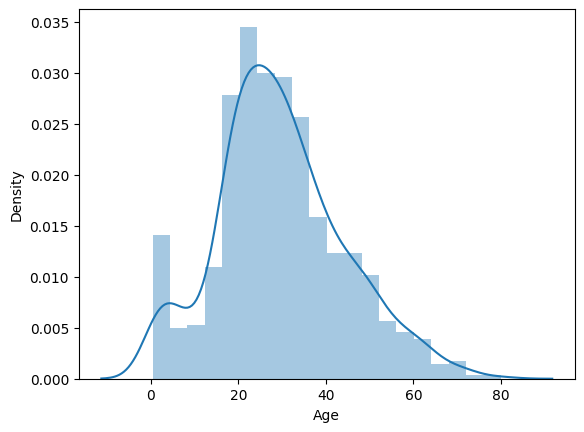

In [7]:
sns.distplot(df_train['Age'])

<Axes: xlabel='Fare', ylabel='Age'>

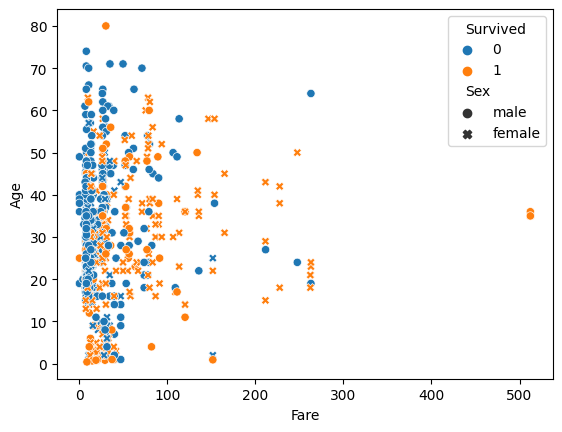

In [8]:
sns.scatterplot(y = df_train['Age'], x = df_train['Fare'], hue = df_train['Survived'], style =df_train['Sex'])

In [9]:
df_train = df_train.drop(["Ticket", "PassengerId", "Name", "Cabin"], axis=1)


In [10]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [11]:
cols = ["SibSp", "Parch", "Fare", "Age"]
for x in cols:
    df_train[x].fillna(df_train[x].median(),inplace=True)
df_train.isna().sum()  

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [12]:
df_test['Embarked'].fillna("S",inplace= True)
df_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### Applying transformations on Columns

In [13]:
df_train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

- OneHotEncoding : Sex , Embarked
- MinMaxScaler for scaling

In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [15]:
X = df_train.drop('Survived', axis=1)
y = df_train['Survived']



In [16]:
categorical_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'))
])

In [17]:
transformer = ColumnTransformer([
    ('imputer_age', SimpleImputer(strategy='most_frequent'), ['Age']),
    ('imputer_embarked',categorical_transformer,['Embarked']),
    ('ohe_sex_embarked', OneHotEncoder(sparse=False, handle_unknown='ignore'), ['Sex'])
], remainder='passthrough')



In [18]:
X_transformed = transformer.fit_transform(X)
X_test_transformed = transformer.transform(df_test)


In [19]:
print(X_test_transformed)

[[34.5     0.      1.     ...  0.      0.      7.8292]
 [47.      0.      0.     ...  1.      0.      7.    ]
 [62.      0.      1.     ...  0.      0.      9.6875]
 ...
 [38.5     0.      0.     ...  0.      0.      7.25  ]
 [28.      0.      0.     ...  0.      0.      8.05  ]
 [28.      1.      0.     ...  1.      1.     22.3583]]


In [20]:
X_transformed.shape , X_test_transformed.shape

((891, 10), (418, 10))

In [21]:
x_train = pd.DataFrame(X_transformed)
x_train.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
dtype: int64

In [22]:
x_test = pd.DataFrame(X_test_transformed)
x_test.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    1
dtype: int64

In [23]:
nan_indices = np.where(np.isnan(X_test_transformed))

print(nan_indices)

(array([152]), array([9]))


In [24]:
x_test.iloc[9].value_counts()

9
0.00     4
1.00     2
21.00    1
3.00     1
2.00     1
24.15    1
Name: count, dtype: int64

In [25]:
 x_test.iloc[152][9] = 0

In [26]:
x_test.iloc[9].value_counts()

9
0.00     4
1.00     2
21.00    1
3.00     1
2.00     1
24.15    1
Name: count, dtype: int64

In [27]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_transformed, y)

DecisionTreeClassifier(random_state=42)

In [28]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_transformed, y)

y_test_pred = clf.predict(X_test_transformed)

print(y_test_pred)

[0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 0 0 1 0 1 1 0
 0 0 0 0 1 0 1 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0
 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 1 1 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 1 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 1 0
 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1 1
 0 1 0 0 1 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 1 0
 0 1 1 1 1 0 0 1 0 0 0]


### Submission Predictions

In [29]:
df = pd.DataFrame({"PassengerId": df_test['PassengerId'].values,
                  "Survive":y_test_pred
                  })
df

,PassengerId,Survive
0,892,0
1,893,0
2,894,1
3,895,1
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [34]:
df.to_csv("submission.csv",index=False)